In [2]:
using Pkg
Pkg.instantiate()
Pkg.add("MCMCChains")
Pkg.add("DataFrames")
Pkg.add("Gadfly")
using TAMode
using LinearAlgebra
using Gadfly
using DataFrames

   Updating registry at `~/.julia/registries/General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`
  Resolving package versions...
No Changes to `~/TAMode.jl/Project.toml`
No Changes to `~/TAMode.jl/Manifest.toml`
  Resolving package versions...
No Changes to `~/TAMode.jl/Project.toml`
No Changes to `~/TAMode.jl/Manifest.toml`
  Resolving package versions...
No Changes to `~/TAMode.jl/Project.toml`
No Changes to `~/TAMode.jl/Manifest.toml`
┌ Info: Precompiling TAMode [294f26d0-a9c2-4f6a-959f-92a060cb6778]
└ @ Base loading.jl:1278


In [3]:
using MCMCChains
chn = read("chain-file-10_1.jls", Chains)
summarize(chn)

Summary Statistics
     parameters      mean       std   naive_se      mcse       ess      rhat  
         Symbol   Float64   Float64    Float64   Float64   Float64   Float64  
                                                                              
        AXLexpr   33.7065    3.1431     0.1988    1.4321    5.4480    1.1274  
         Ig2rev    0.0329    0.0635     0.0040    0.0267    5.0778    1.1228  
         gasCur    0.1279    0.0902     0.0057    0.0332    7.2285    1.0841  
    internalize    0.0473    0.0105     0.0007    0.0031   11.1634    1.0478  
           kDeg    0.0212    0.0048     0.0003    0.0026    4.6812    1.1543  
           kRec    0.1071    0.0119     0.0008    0.0031   18.7062    0.9973  
  pYinternalize    1.0975    0.1366     0.0086    0.0163    9.8463    1.0011  
          scale    0.0212    0.0066     0.0004    0.0034    5.1126    1.1014  
      scaleSurf    0.0002    0.0002     0.0000    0.0001    5.4211    1.1160  
          sortF    0.6591    0.17

In [4]:
Ig2rev = get(chn, :Ig2rev)[1]
scale = get(chn, :scale)[1]
scaleSurf = get(chn, :scaleSurf)[1]

x = get(chn, [:internalize, :pYinternalize, :sortF, :kRec, :kDeg, :xFwd, :gasCur, :AXLexpr]);
samp_params = hcat(x.internalize, x.pYinternalize, x.sortF, x.kRec, x.kDeg, x.xFwd, x.gasCur);

In [5]:
tps = range(0.0, 1440, length=200)
index = 201
# M0
AXLexpr = 15.5
MerTKexpr = 55
Tyro3expr = 3.7
params = vcat(samp_params[index, :], AXLexpr, MerTKexpr, Tyro3expr, Ig2rev[index], [1.0, 1.0, 1.8, 100.0]);

In [6]:
pYAXL = TAMode.pY .* TAMode.recpSpecific[1]
surfAXL = TAMode.surface .* TAMode.recpSpecific[1]
totAXL = TAMode.total .* TAMode.recpSpecific[1]

pYMerTK = TAMode.pY .* TAMode.recpSpecific[2]
surfMerTK = TAMode.surface .* TAMode.recpSpecific[2]
totMerTK = TAMode.total .* TAMode.recpSpecific[2]

pYTyro3 = TAMode.pY .* TAMode.recpSpecific[3]
surfTyro3 = TAMode.surface .* TAMode.recpSpecific[3]
totTyro3 = TAMode.total .* TAMode.recpSpecific[3];

data = TAMode.runTAM(tps, params, 10);

In [7]:
pYA = (data * pYAXL) * scale[index]
surfA = (data * surfAXL) * scaleSurf[index]
totalA = (data * totAXL) # 4067.2585803887146

pYM = (data * pYMerTK) * scale[index]
surfM = (data * surfMerTK) * scaleSurf[index]
totalM = (data * totMerTK) # 85.86830649771866

pYT = (data * pYTyro3) * scale[index]
surfT = (data * surfTyro3) * scaleSurf[index]
totalT = (data * totTyro3); # 440.6731445966876
println(totalM[1])
println(totalA[1])
println(totalT[1])

7300.4776927547355
1311.2359940244746
576.5415499340174


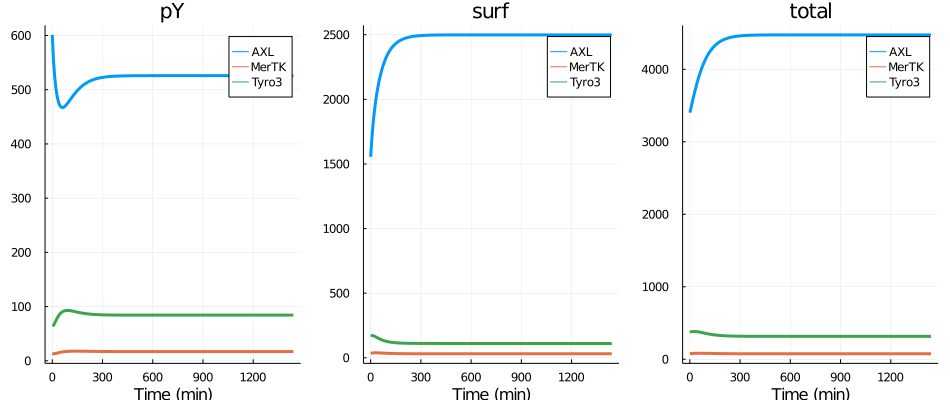

In [8]:
AXLexpr = 45
MerTKexpr = 0.7
Tyro3expr = 3.3
TAMode.plotTimeSeries(chn, AXLexpr, MerTKexpr, Tyro3expr)

  Resolving package versions...
No Changes to `~/TAMode.jl/Project.toml`
No Changes to `~/TAMode.jl/Manifest.toml`


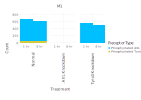

In [9]:
Pkg.add("DataFrames")
using DataFrames
TAMode.plotpYExpression(chn, AXLexpr, MerTKexpr, Tyro3expr, "M1")

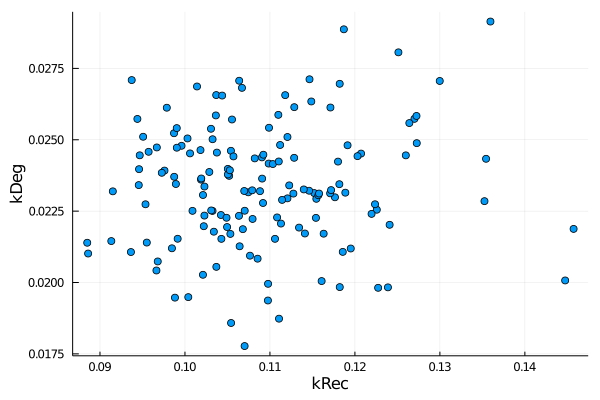

In [56]:
index = 100
scatter(x.kRec[index:250], x.kDeg[index:250], 
        xlabel = "kRec",
        ylabel = "kDeg",
        legend = false) # kRec vs kDeg

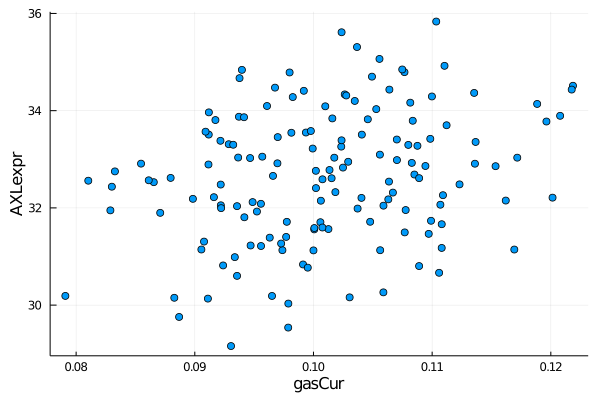

In [57]:
scatter(x.gasCur[index:250], x.AXLexpr[index:250],
        xlabel = "gasCur",
        ylabel = "AXLexpr",
        legend = false)

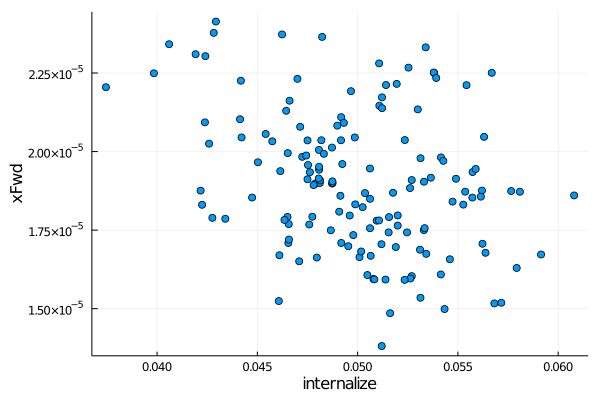

In [59]:
scatter(x.internalize[index:250], x.xFwd[index:250],
        xlabel = "internalize",
        ylabel = "xFwd",
        legend = false)